# HW4 Denisov Ilia

1. Постройте модель линейной регрессии по соответствующему вашему варианту набору данных. 
2. Использовать регуляризацию не нужно! 
3. Рекомендую использовать statmodels.
4. Посмотреть на результаты и попытаться вспомнить, что означают все эти "статистики, критерии ... ".

In [1]:
import statsmodels as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from statsmodels.graphics.api import qqplot
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic as ols_d
from scipy import stats

In [3]:
data = np.loadtxt('data/x20.txt', skiprows=41)

In [4]:
columns = ['One', 'UrbanPopulation', 'LateBirths', 'WineConsumption', 'LiquorConsumption', 'CirrhosisDeathRate']
df = pd.DataFrame(data[:,1:], columns=columns)
df.head()

,One,UrbanPopulation,LateBirths,WineConsumption,LiquorConsumption,CirrhosisDeathRate
0,1.0,44.0,33.2,5.0,30.0,41.2
1,1.0,43.0,33.8,4.0,41.0,31.7
2,1.0,48.0,40.6,3.0,38.0,39.4
3,1.0,52.0,39.2,7.0,48.0,57.5
4,1.0,71.0,45.5,11.0,53.0,74.8


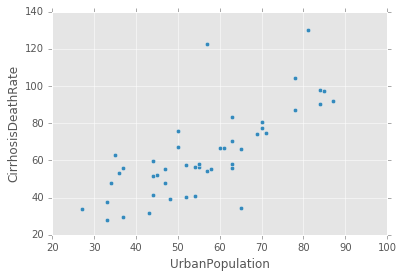

In [14]:
df.plot(kind='scatter', x='UrbanPopulation', y='CirrhosisDeathRate')

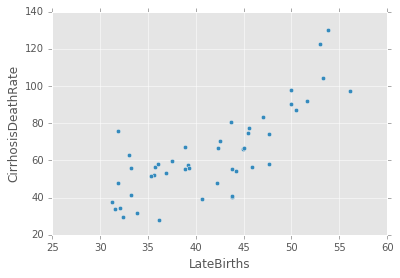

In [15]:
df.plot(kind='scatter', x='LateBirths', y='CirrhosisDeathRate')

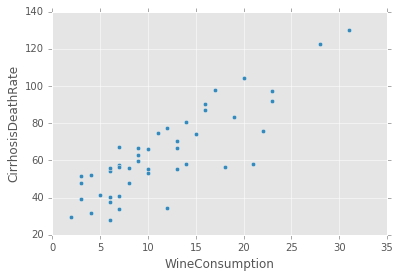

In [16]:
df.plot(kind='scatter', x='WineConsumption', y='CirrhosisDeathRate')

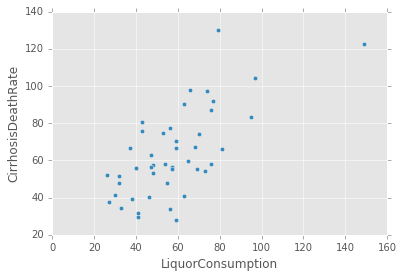

In [17]:
df.plot(kind='scatter', x='LiquorConsumption', y='CirrhosisDeathRate')

In [5]:
lm = smf.ols(formula='CirrhosisDeathRate ~ UrbanPopulation + LateBirths + WineConsumption + LiquorConsumption', data=df).fit()
lm.params

Intercept           -13.963100
UrbanPopulation       0.098286
LateBirths            1.148377
WineConsumption       1.857861
LiquorConsumption     0.048170
dtype: float64

In [6]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CirrhosisDeathRate   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     44.75
Date:                Thu, 26 May 2016   Prob (F-statistic):           1.95e-14
Time:                        23:14:44   Log-Likelihood:                -171.25
No. Observations:                  46   AIC:                             352.5
Df Residuals:                      41   BIC:                             361.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           -13.9631     11.400     -1.225      0.228       -36.987     9.060
UrbanPopulation       0.0983      0.244      0.403      0.689        -0.395     0.591
LateBirths            1.1484      0.583      1.970      0.056        -0.029     2.326
WineConsumption       1.8579      0.401      4.634      0.000         1.048     2.668
LiquorConsumption     0.0482      0.133      0.361      0.720        -0.221     0.317
==============================================================================
Omnibus:                        3.887   Durbin-Watson:                   2.549
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                1.988
Skew:                          -0.211   Prob(JB):                        0.370
Kurtosis:                       2.073   Cond. No.                         688.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

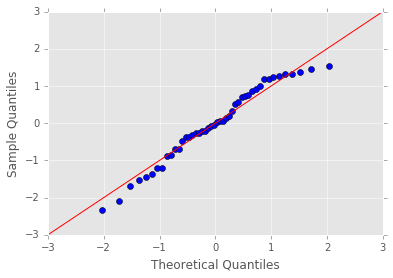

In [9]:
mod_fit = smf.OLS(df['CirrhosisDeathRate'], df[['UrbanPopulation', 'LateBirths', 'WineConsumption', 'LiquorConsumption']]).fit()
res = mod_fit.resid
fig = qqplot(res, stats.norm, fit=True, line='45')
plt.show()

**Мультиколлинеарность**

In [10]:
df[['UrbanPopulation','LateBirths','WineConsumption','LiquorConsumption']].corr()

,UrbanPopulation,LateBirths,WineConsumption,LiquorConsumption
UrbanPopulation,1.000000,0.843281,0.678623,0.440296
LateBirths,0.843281,1.000000,0.639841,0.686364
WineConsumption,0.678623,0.639841,1.000000,0.675921
LiquorConsumption,0.440296,0.686364,0.675921,1.000000


In [ ]:
exog = df[['UrbanPopulation','LateBirths','WineConsumption','LiquorConsumption']]
exog['cons'] = 1

**Тест Бреуша-Пагана**

Нулевая гипотеза - остатки гомоскедастичны.

In [12]:
ols_d.het_breushpagan(res, exog)

(7.8876674324715079,
 0.095780838459321796,
 2.1213236172197849,
 0.095494987846583335)

**Тест Уайта**

In [13]:
ols_d.het_white(res, exog)

(25.827306966944811,
 0.027226160147377054,
 2.8349728398517366,
 0.0076733965320747574)